# **Clustering**

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [204]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
scaler=StandardScaler()
datos_scaled=scaler.fit_transform(datos)
datos_scaled=pd.DataFrame(datos_scaled,columns=datos.columns,index=datos.index)
#datos_scaled.reset_index(inplace=True)
#datos_scaled.set_index('rownames', inplace=True)
datos_scaled

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530


In [205]:
# calculo de distancia
distancias=pairwise_distances(X=datos_scaled,metric='euclidean')
distancias[np.triu_indices(n=distancias.shape[0])]=np.nan
distancias=pd.DataFrame(distancias,columns=datos_scaled.index,index=datos_scaled.index)
distancias.iloc[:4,:4]

rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


In [206]:
url='customer_segmentation.csv'
df=pd.read_csv(url,sep=',')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [207]:
df.shape

(2240, 29)

In [208]:
# Total de nulos
print(f'Los números nulos son : {df.isnull().sum().sum()}')
df.isnull().sum()

Los números nulos son : 24


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **EDA**

In [210]:
cat=df.select_dtypes(include='object').columns
cat=['Education', 'Marital_Status']

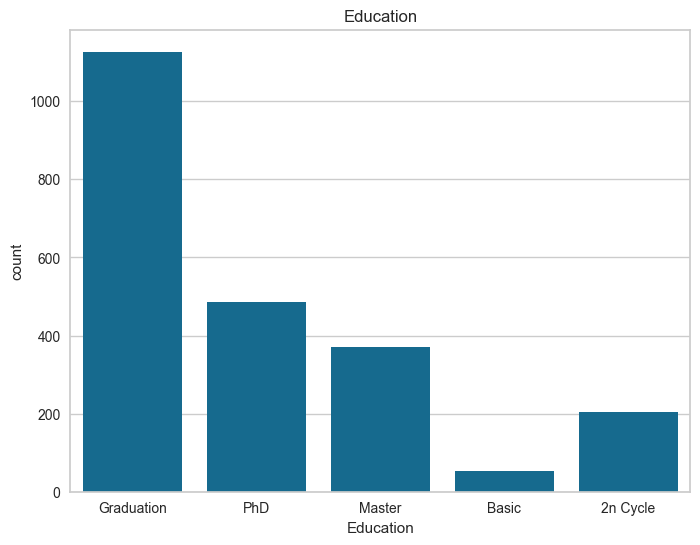

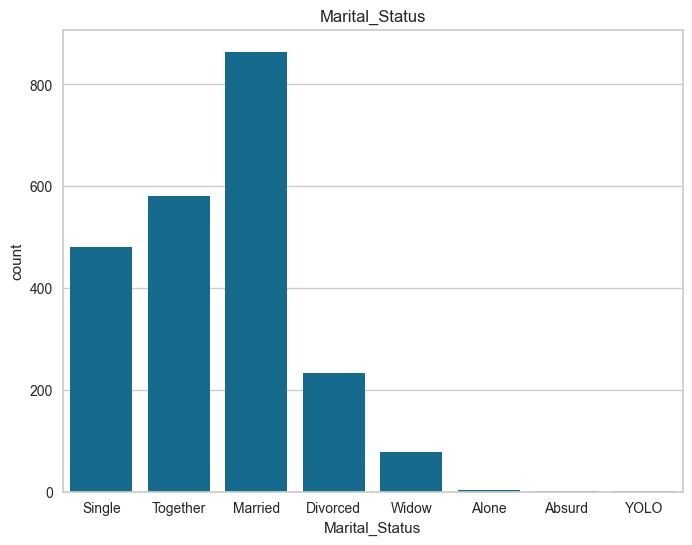

In [211]:
for i in cat:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=i)
    plt.title(i,fontsize=12)
    plt.show()

* Existe outlier en la columna ingresos y fecha de cumpleaños

In [212]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
dates=[]
for i in df['Dt_Customer']:
    i=i.date()
    dates.append(i)
print("The newest customer´s enrolment date in the records ",max(dates))
print("The oldest customer's enrolment date in the recordos ",min(dates))    

The newest customer´s enrolment date in the records  2014-06-29
The oldest customer's enrolment date in the recordos  2012-07-30


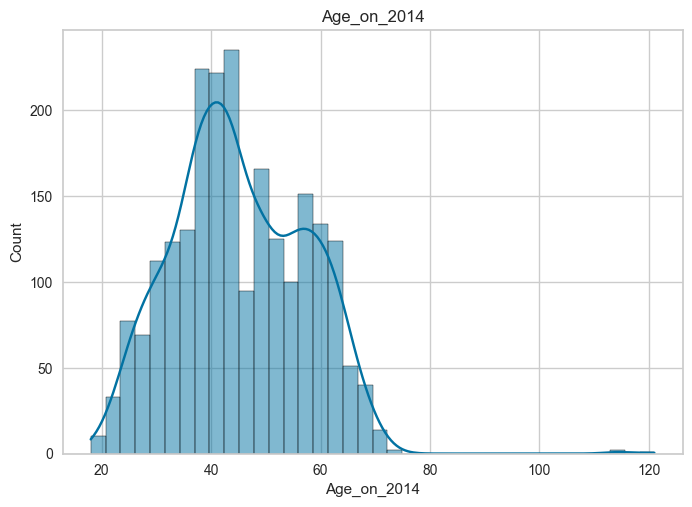

In [213]:
df['Age_on_2014']=2014-df['Year_Birth']
sns.histplot(data=df,x='Age_on_2014',kde=True)
plt.title('Age_on_2014')
plt.show()

* Existe outliers en la edad, ya que es imposible gente con una edad de 120 años

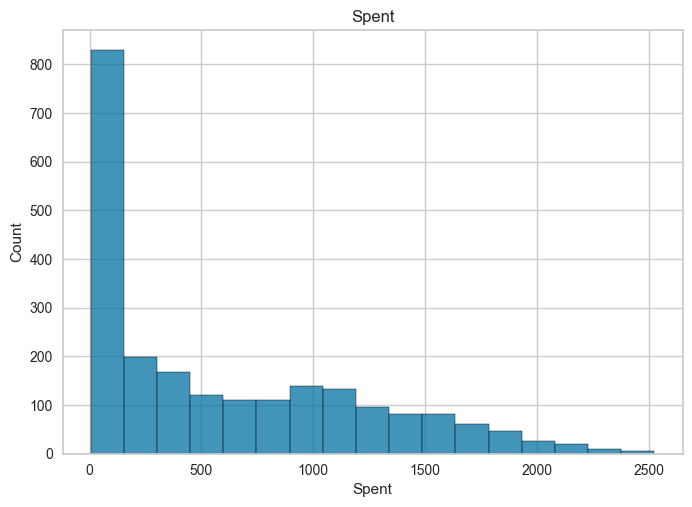

In [214]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
sns.histplot(data=df,x='Spent')
plt.title('Spent')
plt.show()

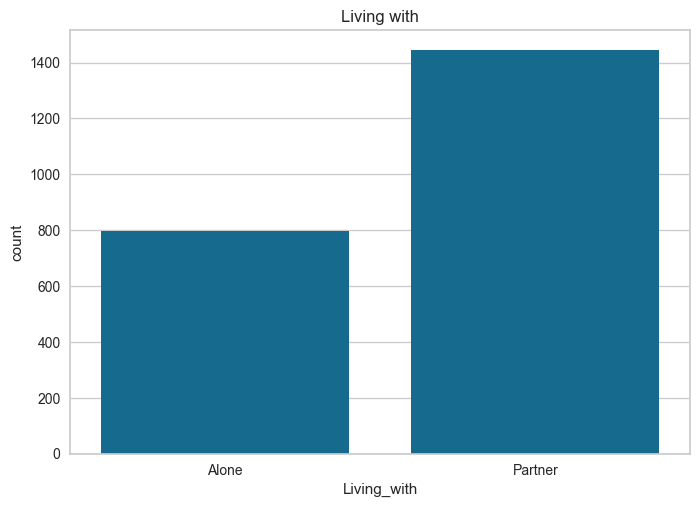

In [215]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
                                                  "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", 
                                                  "Single":"Alone"})
sns.countplot(data=df,x='Living_with')
plt.title('Living with')
plt.show()

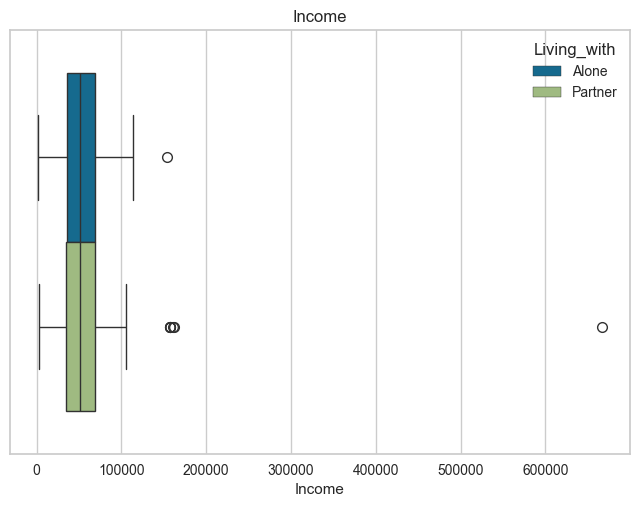

In [216]:
sns.boxplot(data=df,x='Income',hue='Living_with')
plt.title('Income')
plt.show()

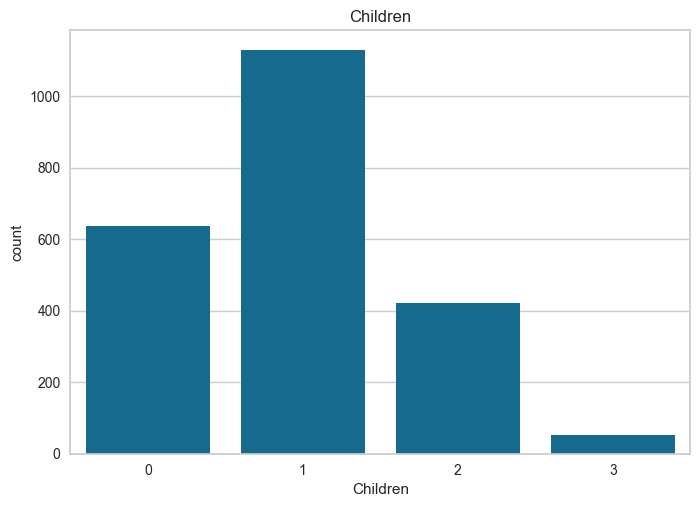

In [217]:
df['Children']= df['Kidhome'] + df['Teenhome']
sns.countplot(data=df,x='Children')
plt.title('Children')
plt.show()

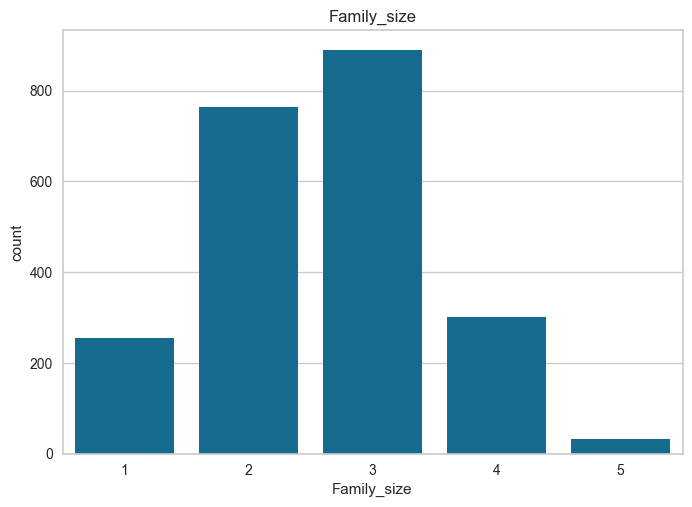

In [218]:
df['Family_size'] = df['Living_with'].replace({"Alone": 1, "Partner": 2}) + df['Children']
sns.countplot(data=df,x='Family_size')
plt.title('Family_size')
plt.show()

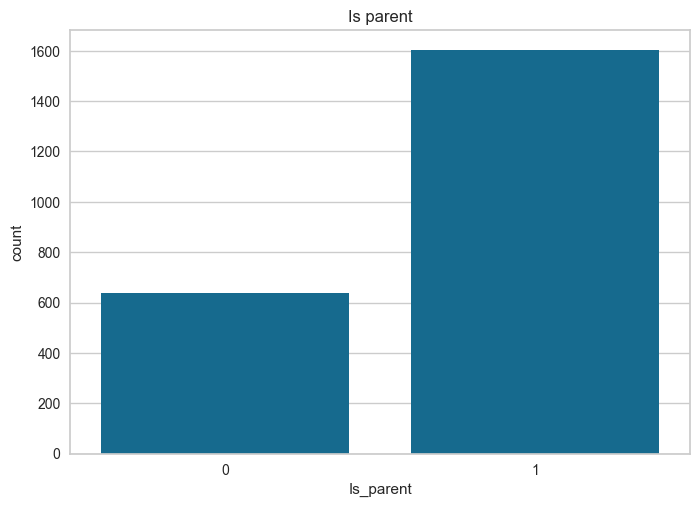

In [219]:
df['Is_parent'] = np.where(df.Children > 0, 1, 0)
sns.countplot(data=df,x='Is_parent')
plt.title('Is parent',fontsize=12)
plt.show()

In [220]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2014,Spent,Children,Family_size,Is_parent
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.013393,0.009375,3.0,11.0,0.149107,45.194196,605.798214,0.950446,2.595089,0.715179
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,3.0,11.0,0.000000,37.000000,68.750000,0.000000,2.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,3.0,11.0,0.000000,44.000000,396.000000,1.000000,3.000000,1.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1045.500000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,3.0,11.0,1.000000,121.000000,2525.000000,3.000000,5.000000,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288,0.751803,0.906959,0.451430


In [221]:
df = df.drop(columns = ['Marital_Status', 'Dt_Customer', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'],
             axis = 1)

In [222]:
df = df[(df["Age_on_2014"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


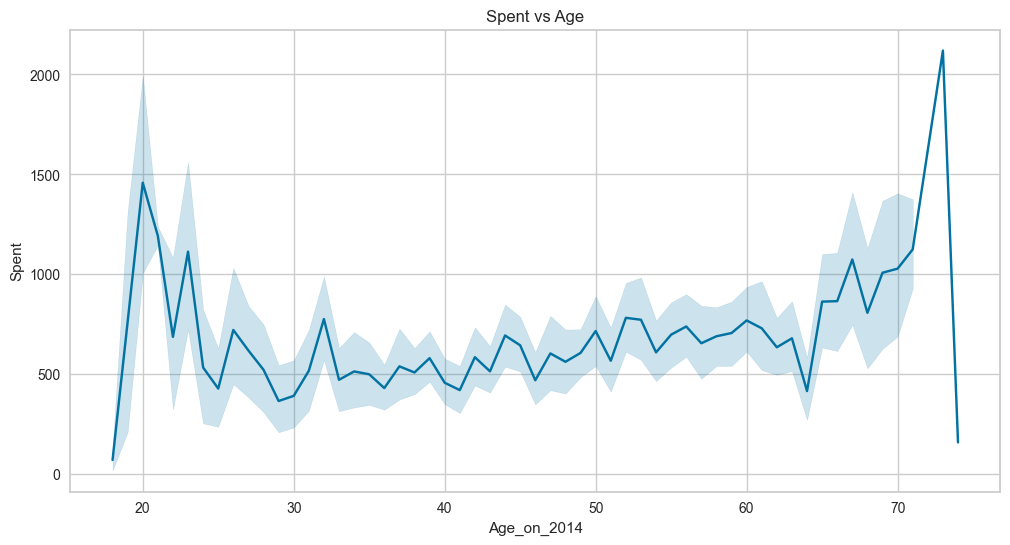


Correlation between Age_on_2014 and Spent: 0.11590083664783475


In [223]:
plt.figure(figsize = (12, 6))
sns.lineplot(df, x = 'Age_on_2014', y = 'Spent')
plt.title("Spent vs Age")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Age_on_2014'].corr(df['Spent'])}")

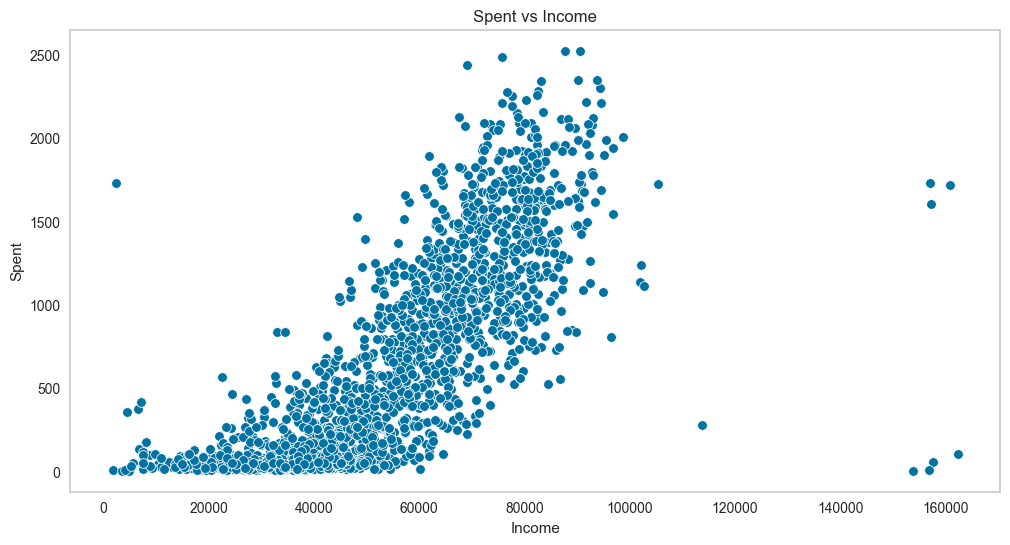


Correlation between Age_on_2014 and Spent: 0.7927397698771241


In [224]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Income'].corr(df['Spent'])}")

## *Normalización de datos*

In [225]:
cat=df.select_dtypes(include='object').columns
le=LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(le.fit_transform)

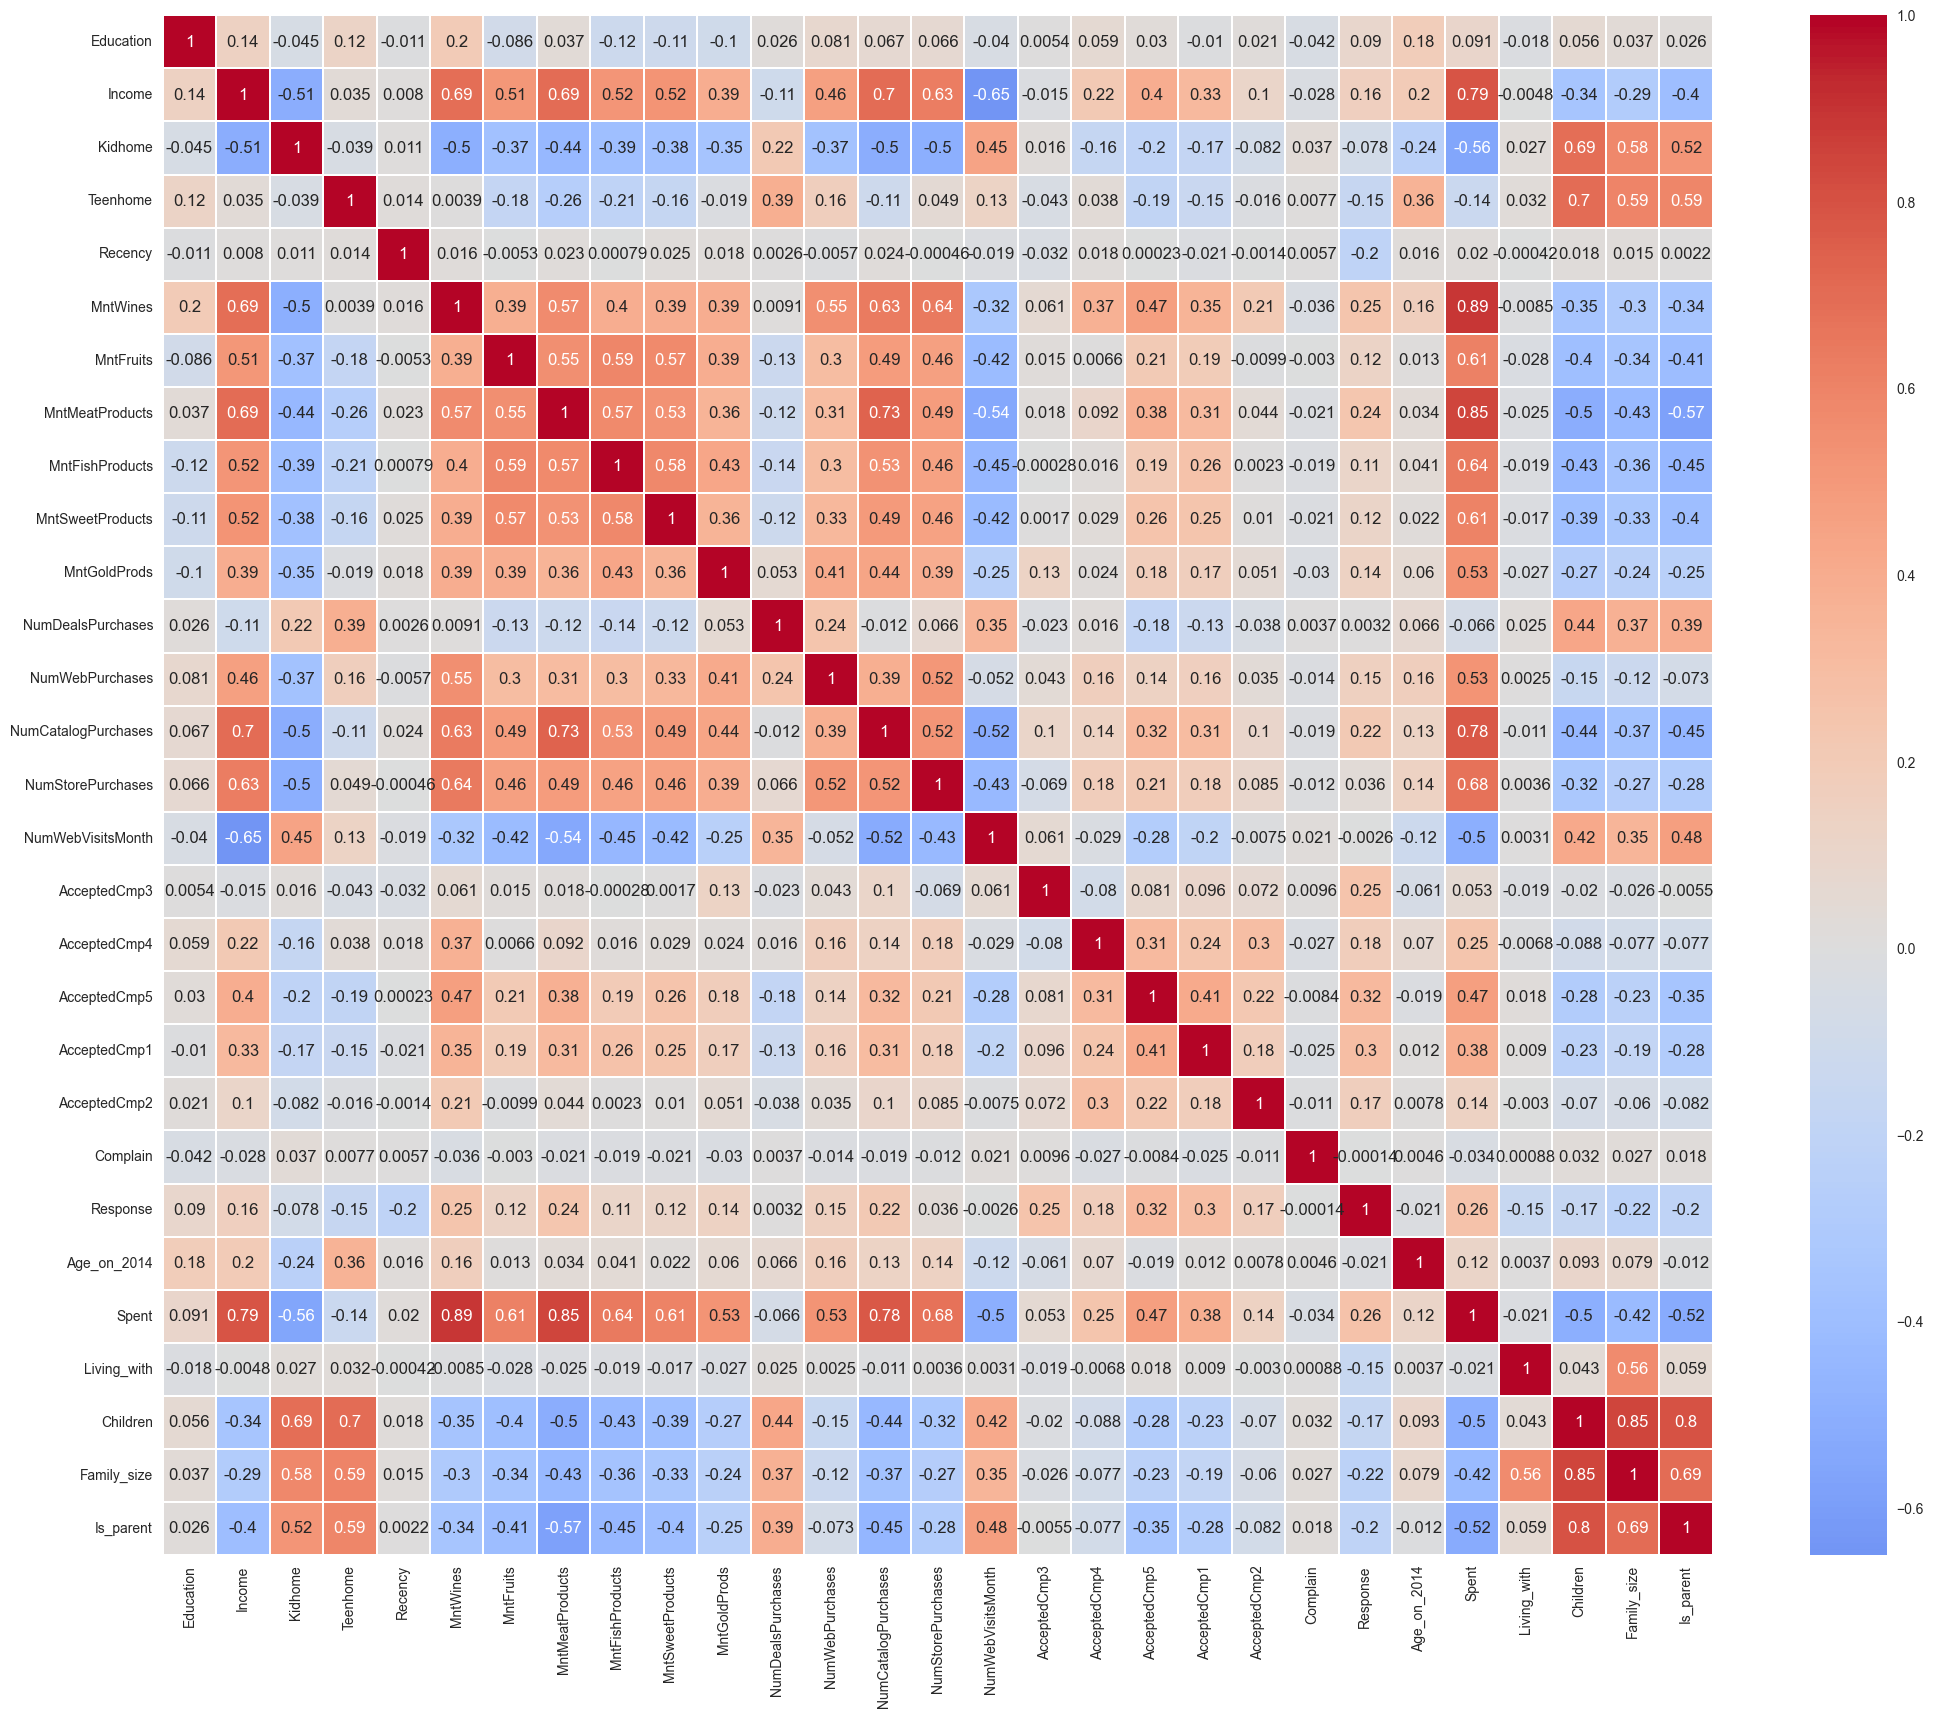

In [226]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0,linewidths=0.2)
plt.show()

In [227]:
df1=df.copy()
sclaer=StandardScaler()
scaler.fit(df1)
scaled_df = pd.DataFrame(scaler.transform(df1), columns = df1.columns)
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Living_with,Children,Family_size,Is_parent
0,-0.352543,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.261914,-0.117256,-0.09552,2.375425,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.352543,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.352543,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.352543,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.429916,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [228]:
pca=PCA(random_state=42,svd_solver='full')
pca.fit(scaled_df)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(f'Number of dimensionr {d}')

Number of dimensionr 21


In [229]:
# Initiating PCA to reduce dimensions aka features to 19
pca = PCA(n_components = 19, random_state = 42, svd_solver = 'full')
pca.fit(scaled_df)
df1_reduced = pd.DataFrame(pca.transform(scaled_df), columns = (['col1', 'col2', 'col3', 'col4',
                                                                  'col5', 'col6', 'col7', 'col8',
                                                                  'col9', 'col10', 'col11', 'col12',
                                                                  'col13', 'col14', 'col15', 'col16',
                                                                  'col17', 'col18', 'col19']))

Elbow Method to determine the number of clusters to be formed:


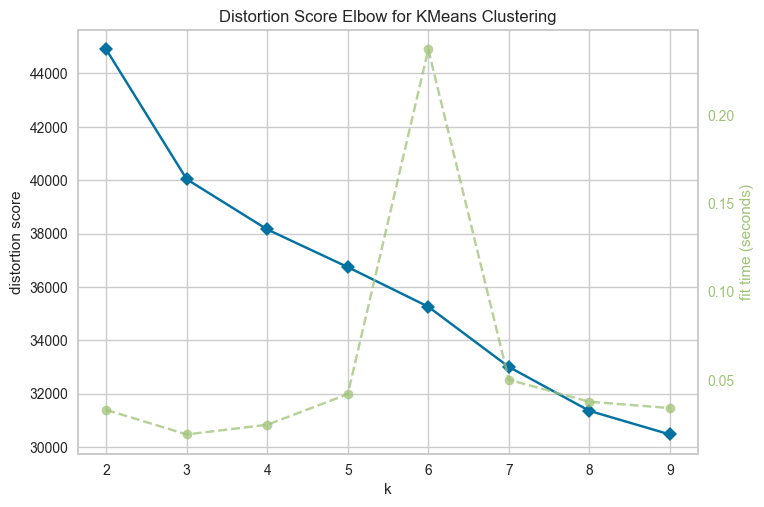

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [230]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print("Elbow Method to determine the number of clusters to be formed:")
elbow = KElbowVisualizer(KMeans(), k = 9)
elbow.fit(df1_reduced)
elbow.show()

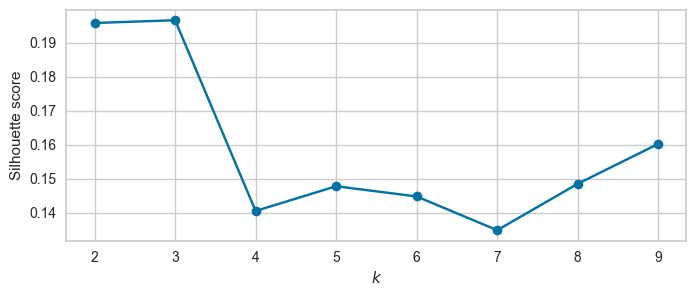

In [231]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df1_reduced)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(df1_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

In [232]:
cluster_range = range(2, 10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", score)

Silhouette Score for 2 Clusters: 0.19574072257311392
Silhouette Score for 3 Clusters: 0.19655462505490834
Silhouette Score for 4 Clusters: 0.14050999724131719
Silhouette Score for 5 Clusters: 0.14777630810385406
Silhouette Score for 6 Clusters: 0.14477127050563127
Silhouette Score for 7 Clusters: 0.13485264206188588
Silhouette Score for 8 Clusters: 0.14849738172445337
Silhouette Score for 9 Clusters: 0.16021526503604794


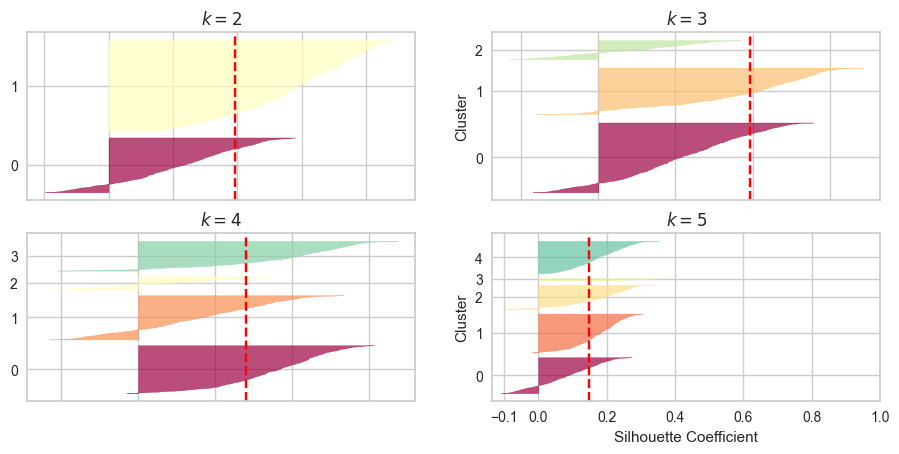

In [233]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import  FixedLocator,FixedFormatter

plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df1_reduced, y_pred)

    padding = len(df1_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()
        
        

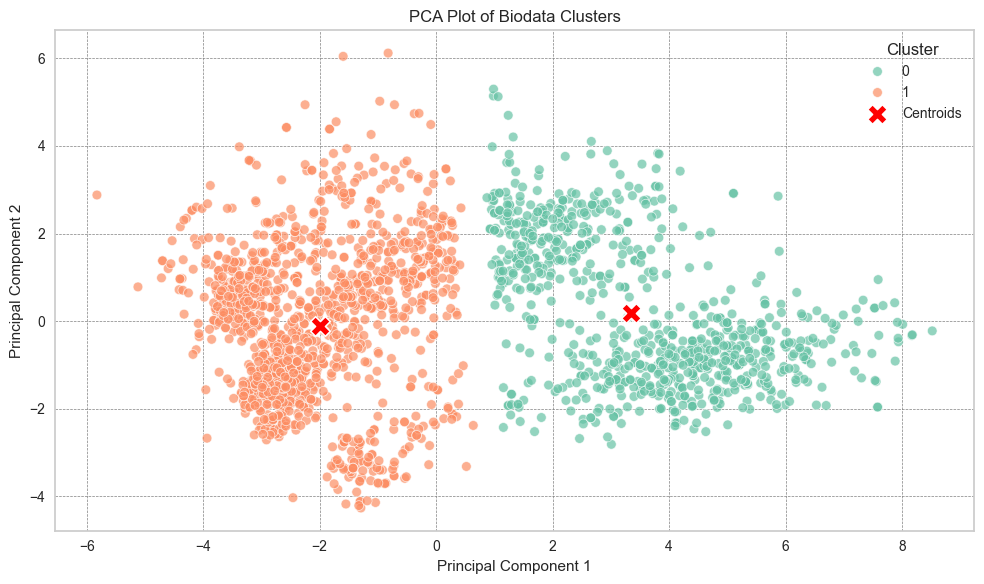

In [234]:
# Cluster Image

kmeans = KMeans(n_clusters= 2, random_state=42)  #change value of n_clusters
cluster_labels = kmeans.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)


df2 = pd.read_excel('Clustered_data.xlsx')

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df2['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.legend(title = 'Cluster')


plt.show()

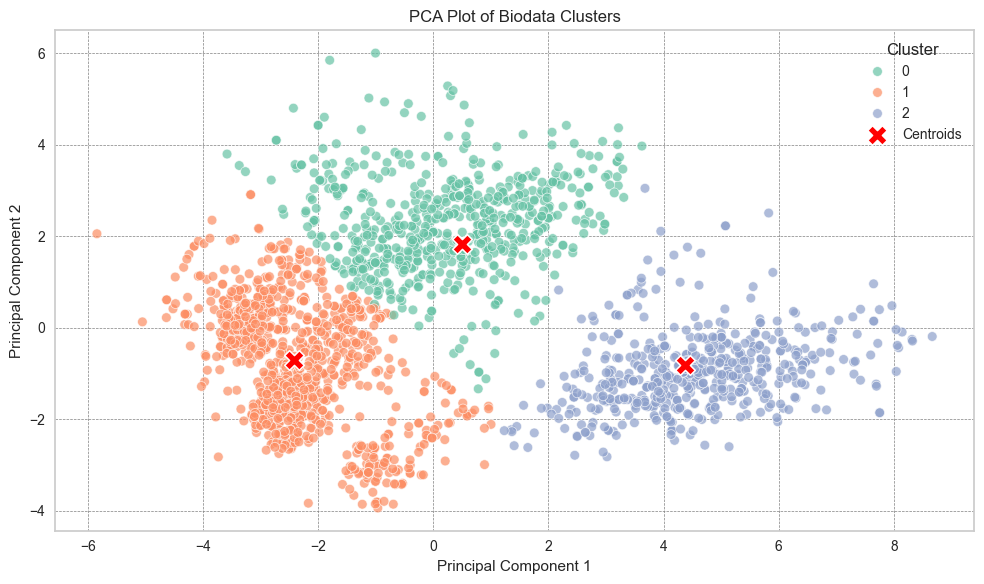

In [235]:
# Crear clusters con 3 componentes
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambiado a 3 clusters
cluster_labels = kmeans.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data_3.xlsx', index=False)

# Leer los datos clusterizados
df2 = pd.read_excel('Clustered_data_3.xlsx')

# Normalizar los datos
scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

# Aplicar PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

# Agregar los componentes principales al DataFrame
df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]

# Configurar la paleta de colores para 3 clusters
cluster_palette = sns.color_palette("Set2", n_colors=len(df2['Cluster'].unique()))

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(df2, x='PC1', y='PC2', hue='Cluster', palette=cluster_palette, alpha=0.7)

# Etiquetas y título del gráfico
plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Ajustes de leyenda y cuadrícula
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Graficar los centroides
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                marker='X', s=200, color='red', label='Centroids')
plt.legend(title='Cluster')

plt.show()


In [236]:
kmeans=KMeans(n_clusters=2,random_state=100)
cluster_labels=kmeans.fit_predict(df1_reduced)
df1['Cluster']=cluster_labels
df1.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Age_on_2014,Spent,Living_with,Children,Family_size,Is_parent,Cluster
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57,1617,0,0,1,0,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,60,27,0,2,3,1,1
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,49,776,1,0,2,0,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,30,53,1,1,3,1,1
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,33,422,1,1,3,1,1


## **Agglomerative Clustering**

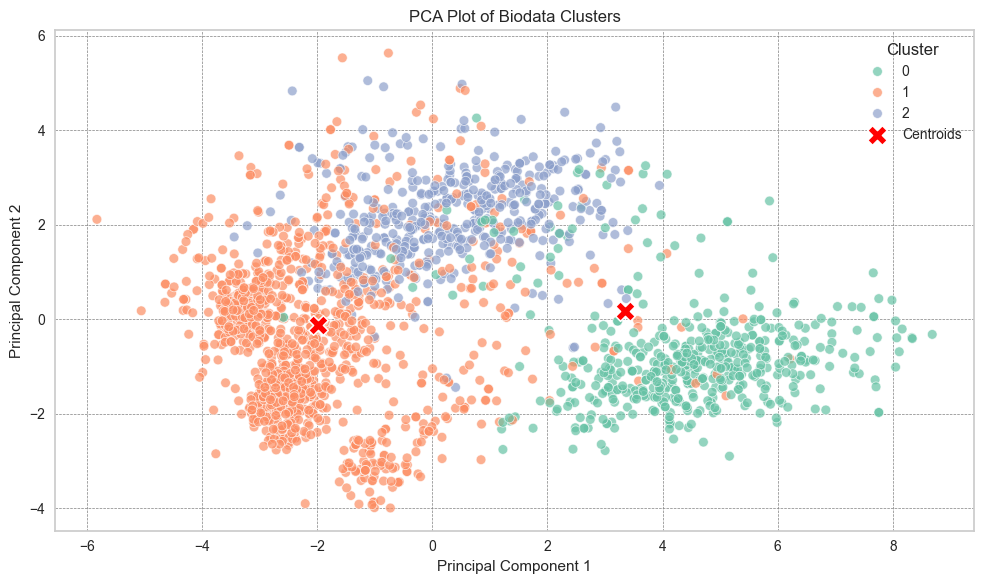

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Crear clusters con Agglomerative Clustering

agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglomerative.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data_3.xlsx', index=False)

# Leer los datos clusterizados
df2 = pd.read_excel('Clustered_data_3.xlsx')

# Normalizar los datos
scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

# Aplicar PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

# Agregar los componentes principales al DataFrame
df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]

# Configurar la paleta de colores para 3 clusters
cluster_palette = sns.color_palette("Set2", n_colors=len(df2['Cluster'].unique()))

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(df2, x='PC1', y='PC2', hue='Cluster', palette=cluster_palette, alpha=0.7)

# Etiquetas y título del gráfico
plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Ajustes de leyenda y cuadrícula
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Graficar los centroides
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                marker='X', s=200, color='red', label='Centroids')
plt.legend(title='Cluster')

plt.show()

## **Gausiano**

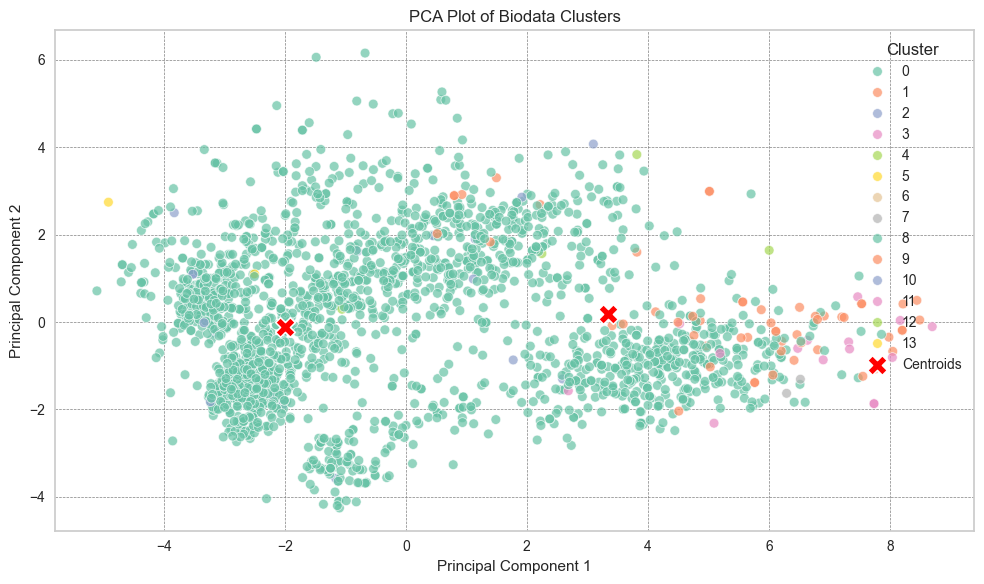

In [240]:
from sklearn.cluster import MeanShift
# Crear clusters con Mean Shift
mean_shift = MeanShift()
cluster_labels = mean_shift.fit_predict(df1_reduced)

df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data_3.xlsx', index=False)

# Leer los datos clusterizados
df2 = pd.read_excel('Clustered_data_3.xlsx')

# Normalizar los datos
scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

# Aplicar PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

# Agregar los componentes principales al DataFrame
df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]

# Configurar la paleta de colores para 3 clusters
cluster_palette = sns.color_palette("Set2", n_colors=len(df2['Cluster'].unique()))

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(df2, x='PC1', y='PC2', hue='Cluster', palette=cluster_palette, alpha=0.7)

# Etiquetas y título del gráfico
plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Ajustes de leyenda y cuadrícula
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Graficar los centroides
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                marker='X', s=200, color='red', label='Centroids')
plt.legend(title='Cluster')

plt.show()